In [2]:
# load data files
# execute this cell and choose train.csv and test.csv
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
# imports
import pandas as pd
import io
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [0]:
# load data into dataframes
train_data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
test_data = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [186]:
# inspect columns
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [187]:
# inspect column distributions
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [188]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

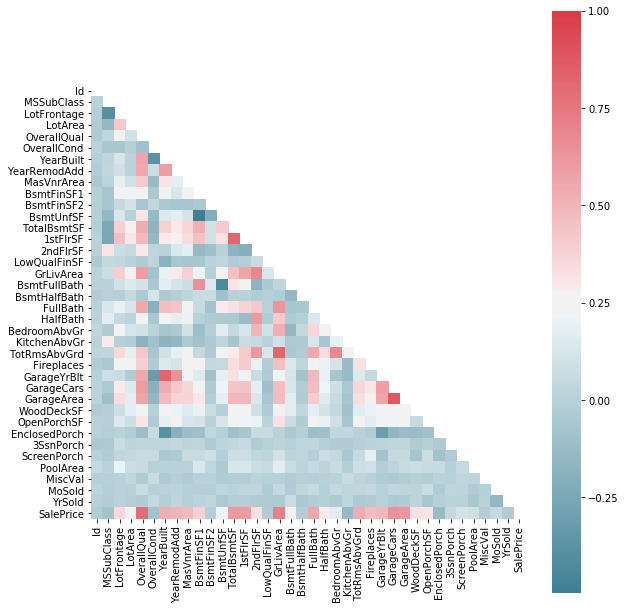

In [189]:
# make heatmap of correllations
corr = train_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9, 9))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, ax=ax,  square=True)
fig.tight_layout()

In [190]:
# dumb linear model with all features converting all categorical variables to simple dummies
dummies = pd.get_dummies(train_data).dropna()
X = dummies.drop(['SalePrice', 'Id'], axis=1)
y = dummies['SalePrice']
lm = LinearRegression()
lm.fit(X,y)
y_pred = lm.predict(X)
sqrt(mean_squared_log_error(y, y_pred))

0.1078552946197319

Now analyze features 1 by 1 and decide if they are needed or if any changes are needed

In [0]:
# drop Id column it shouldn't matter
train_data.drop('Id', axis=1, inplace=True)

In [0]:
# MSSubClass is an int but it really represents a set of categories
# the information in the categories is mostly contained in other features so let's drop it
train_data.drop('MSSubClass', axis=1, inplace=True)

In [193]:
train_data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [0]:
res_zones = ['FV','RH','RL','RP','RM']
train_data['ResZoned'] = train_data['MSZoning'].isin(res_zones)
train_data['Density'] = train_data.apply(lambda x: 4, axis= 1)
train_data.loc[train_data['MSZoning'].isin(['RL', 'RP', 'A']), 'Density'] = 1
train_data.loc[train_data['MSZoning'].isin(['RM', 'FV']), 'Density'] = 2
train_data.loc[train_data['MSZoning'] == 'RH', 'Density'] = 3

In [0]:
train_data.drop('MSZoning', axis=1, inplace=True)

In [0]:
le = LabelEncoder()

In [0]:
train_data['RoadType'] = train_data[['Street']].apply(lambda col: le.fit_transform(col))

In [0]:
train_data.drop('Street', axis=1, inplace=True)

In [0]:
train_data['HasAlley'] = train_data['Alley'].isin(['Grvl','Pave'])

In [0]:
train_data.drop('Alley', axis=1, inplace=True)

In [0]:
oeShape = OrdinalEncoder(categories=[['Reg', 'IR1', 'IR2', 'IR3']])
train_data['Shape'] = oeShape.fit_transform(train_data[['LotShape']])

In [0]:
train_data.drop('LotShape', axis=1, inplace=True)

In [0]:
train_data.drop('LandContour', axis=1, inplace=True)

In [0]:
oeUtil = OrdinalEncoder(categories=[['ELO', 'NoSeWa', 'NoSewr', 'AllPub']])
train_data['Utils'] = oeUtil.fit_transform(train_data[['Utilities']])

In [0]:
train_data.drop('Utilities', axis=1, inplace=True)

In [0]:
train_data['IsCulDSac'] = train_data['LotConfig'] == 'CulDSac'
train_data['HasFrontage'] = train_data['LotConfig'].isin(['FR2', 'FR3'])

In [0]:
train_data.drop('LotConfig', axis=1, inplace=True)

In [0]:
oeSlope = OrdinalEncoder(categories=[['Gtl', 'Mod', 'Sev']])
train_data['Slope'] = oeSlope.fit_transform(train_data[['LandSlope']])

In [0]:
train_data.drop('LandSlope', axis=1, inplace=True)

In [0]:
train_data = pd.concat([train_data, pd.get_dummies(train_data['Neighborhood'])], axis=1)

In [0]:
train_data.drop('Neighborhood', axis=1, inplace=True)

In [0]:
def get_prox_num(x):
  pos = 0
  neg = 0
  if(x['Condition1'] == 'RRAn' or x['Condition1'] == 'RRAe'  or x['Condition2'] == 'RRAn' or x['Condition2'] == 'RRAe'):
    neg = -2
  elif(x['Condition1'] == 'RRNn' or x['Condition1'] == 'RRNe'  or x['Condition2'] == 'RRNn' or x['Condition2'] == 'RRNe'):
    neg = -1
  
  if(x['Condition1'] == 'PosA'  or x['Condition2'] == 'PosA'):
    pos = 2
  elif(x['Condition1'] == 'PosN'  or x['Condition2'] == 'PosN'):
    pos = 1

  return pos + neg

In [0]:
train_data['ProximityScore'] = train_data.apply(lambda x: get_prox_num(x), axis=1)

In [0]:
train_data.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

In [0]:

oeBldg = OrdinalEncoder(categories=[['2FmCon', 'TwnhsI', 'TwnhsE', 'Duplx', '1Fam']])
train_data.loc[train_data['BldgType'] == '2fmCon', 'BldgType'] = '2FmCon'
train_data.loc[train_data['BldgType'] == 'Twnhs', 'BldgType'] = 'TwnhsI'
train_data.loc[train_data['BldgType'] == 'Duplex', 'BldgType'] = 'Duplx'
train_data['Bldg'] = oeBldg.fit_transform(train_data[['BldgType']])

In [0]:
train_data.drop('BldgType', axis=1, inplace=True)

In [0]:
oeHouse = OrdinalEncoder(categories=[['1Story', '1.5Unf', '1.5Fin', 'SFoyer', 'SLvl', '2Story', '2.5Unf', '2.5Fin']])
train_data['House'] = oeHouse.fit_transform(train_data[['HouseStyle']])

In [0]:
train_data.drop('HouseStyle', axis=1, inplace=True)

In [219]:
print(train_data['YearBuilt'].min())
print(train_data['YearRemodAdd'].min())
print(train_data['YearBuilt'].max())
print(train_data['YearRemodAdd'].max())

1872
1950
2010
2010


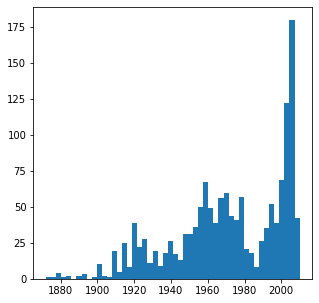

In [220]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(train_data['YearBuilt'], bins = 50)
fig.show()

In [0]:
train_data.drop('RoofStyle', axis=1, inplace=True)

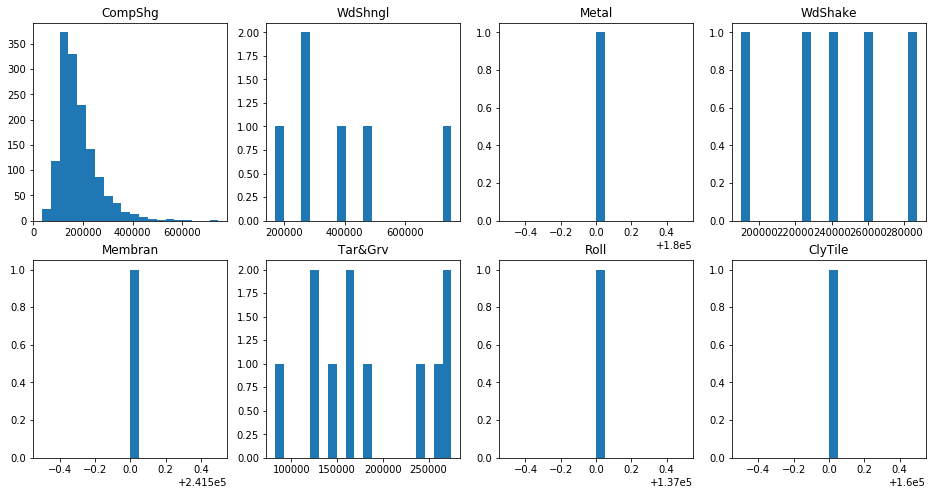

In [222]:
fig = plt.figure(figsize=(16,8))
mats = train_data['RoofMatl'].unique()
for idx,mat in enumerate(mats, start=1):
  ax = fig.add_subplot(2,4,idx)
  ax.hist(train_data.loc[train_data['RoofMatl'] == mat, 'SalePrice'], bins = 20)
  ax.set_title(mat)
fig.show()

In [223]:
print(len(train_data.loc[train_data['RoofMatl'] == 'Metal']))
print(len(train_data.loc[train_data['RoofMatl'] == 'Membran']))
print(len(train_data.loc[train_data['RoofMatl'] == 'Roll']))
print(len(train_data.loc[train_data['RoofMatl'] == 'ClyTile']))

1
1
1
1


In [0]:
# not enough distribution on the values besides CompShg
train_data.drop('RoofMatl', axis=1, inplace=True)

In [0]:
ext_dummies = pd.get_dummies(train_data[['Exterior1st', 'Exterior2nd']], {'Exterior1st': 'Ext', 'Exterior2nd': 'Ext2'}, columns=['Exterior1st', 'Exterior2nd'])

rmvCols = []
for col in ext_dummies.columns:
  if 'Ext2' in col:
    mat = col.split('_')[1]
    if mat == 'Brk Cmn':
      mat = 'BrkComm'
    if mat == 'CmentBd':
      mat = 'CemntBd'
    if mat == 'Wd Shng':
      mat = 'WdShing'
    extCol = 'Ext_' + mat
    if extCol not in ext_dummies.columns:
      ext_dummies[extCol] = ext_dummies[col]
    ext_dummies[extCol] = ext_dummies[extCol] | ext_dummies[col]
    rmvCols.append(col)
ext_dummies.drop(rmvCols, axis=1, inplace=True)

train_data = pd.concat([train_data, ext_dummies], axis=1)

In [0]:
train_data.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)

In [0]:
train_data.loc[train_data['MasVnrType'].isna(), 'MasVnrType'] = 'None'
oeMasonry = OrdinalEncoder(categories=[['CBlock', 'None', 'BrkCmn', 'BrkFace', 'Stone']])
train_data['Masonry'] = oeMasonry.fit_transform(train_data[['MasVnrType']])

In [0]:
train_data.drop('MasVnrType', axis=1, inplace=True)

In [0]:
train_data.loc[train_data['MasVnrArea'].isna(), 'MasVnrArea'] = 0

In [0]:
oeExtQ = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['ExtQual'] = oeExtQ.fit_transform(train_data[['ExterQual']])
train_data['ExtCond'] = oeExtQ.fit_transform(train_data[['ExterCond']])

In [0]:
train_data.drop(['ExterQual', 'ExterCond'], axis=1, inplace=True)

PConc mean= 225230.44204018547
CBlock mean= 149805.714511041
BrkTil mean= 132291.07534246575
Wood mean= 185666.66666666666
Slab mean= 107365.625
Stone mean= 165959.16666666666


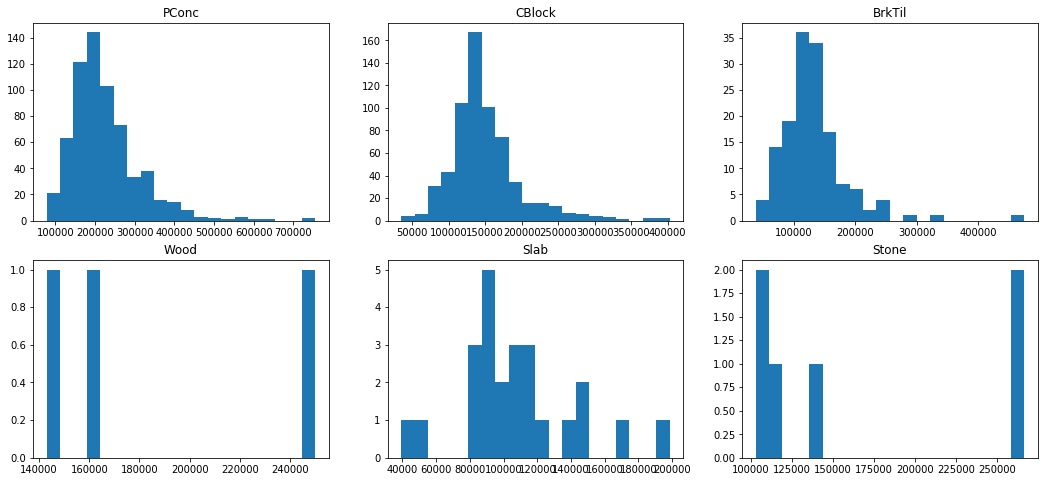

In [232]:
fig = plt.figure(figsize=(18,8))
mats = train_data['Foundation'].unique()
for idx,mat in enumerate(mats, start=1):
  ax = fig.add_subplot(2,3,idx)
  ax.hist(train_data.loc[train_data['Foundation'] == mat, 'SalePrice'], bins = 20)
  ax.set_title(mat)
  print(mat + ' mean= ' + str(train_data.loc[train_data['Foundation'] == mat, 'SalePrice'].mean()))
fig.show()

In [0]:
oeFound = OrdinalEncoder(categories=[['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone']])
train_data['FoundationMat'] = oeFound.fit_transform(train_data[['Foundation']])

In [0]:
train_data.drop('Foundation', axis=1, inplace=True)

In [0]:
train_data.loc[train_data['BsmtQual'].isna(), 'BsmtQual'] = 'NA'
train_data.loc[train_data['BsmtCond'].isna(), 'BsmtCond'] = 'NA'
oeBsmtQ = OrdinalEncoder(categories=[['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['BsmtQ'] = oeBsmtQ.fit_transform(train_data[['BsmtQual']])
train_data['BsmtC'] = oeBsmtQ.fit_transform(train_data[['BsmtCond']])

In [0]:
train_data.drop(['BsmtQual', 'BsmtCond'], axis=1, inplace=True)

In [0]:
train_data.loc[train_data['BsmtExposure'].isna(), 'BsmtExposure'] = 'NA'
oeBsmtExp = OrdinalEncoder(categories=[['NA', 'No', 'Mn', 'Av', 'Gd']])
train_data['BsmtExp'] = oeBsmtExp.fit_transform(train_data[['BsmtExposure']])

In [0]:
train_data.drop('BsmtExposure', axis=1, inplace=True)

In [0]:
train_data['FinBsmtArea'] = train_data['TotalBsmtSF'] - train_data['BsmtUnfSF']

In [0]:
train_data.drop(['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF'], axis=1, inplace=True)

In [0]:
oeHeat = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['HeatingQual'] = oeHeat.fit_transform(train_data[['HeatingQC']])

In [0]:
train_data.drop(['HeatingQC', 'Heating'], axis=1, inplace=True)

In [0]:
train_data['CentrlAir'] = train_data[['CentralAir']].apply(lambda col: le.fit_transform(col))

In [0]:
train_data.drop('CentralAir', axis=1, inplace=True)

In [0]:
train_data.loc[train_data['Electrical'].isna(), 'Electrical'] = 'NA'
oeElec = OrdinalEncoder(categories=[['NA', 'FuseP', 'FuseF', 'Mix', 'FuseA', 'SBrkr']])
train_data['Elec'] = oeElec.fit_transform(train_data[['Electrical']])

In [0]:
train_data.drop('Electrical', axis=1, inplace=True)

In [0]:
oeKitch = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['KitchQual'] = oeKitch.fit_transform(train_data[['KitchenQual']])

In [0]:
train_data.drop('KitchenQual', axis=1, inplace=True)

In [0]:
oeFunc = OrdinalEncoder(categories=[['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']])
train_data['HomeFunct'] = oeFunc.fit_transform(train_data[['Functional']])

In [0]:
train_data.drop('Functional', axis=1, inplace=True)

In [0]:
train_data.loc[train_data['FireplaceQu'].isna(), 'FireplaceQu'] = 'NA'
oeFireQ = OrdinalEncoder(categories=[['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['FireplQual'] = oeFireQ.fit_transform(train_data[['FireplaceQu']])

In [0]:
train_data.drop('FireplaceQu', axis=1, inplace=True)

In [0]:
train_data.loc[train_data['GarageQual'].isna(), 'GarageQual'] = 'NA'
train_data.loc[train_data['GarageCond'].isna(), 'GarageCond'] = 'NA'
oeGarage = OrdinalEncoder(categories=[['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['GarageQ'] = oeGarage.fit_transform(train_data[['GarageQual']])
train_data['GarageC'] = oeGarage.fit_transform(train_data[['GarageCond']])

In [0]:
train_data.loc[train_data['GarageFinish'].isna(), 'GarageFinish'] = 'NA'
oeGarageFin = OrdinalEncoder(categories=[['NA', 'Unf', 'RFn', 'Fin']])
train_data['GarageFin'] = oeGarageFin.fit_transform(train_data[['GarageFinish']])

In [0]:
train_data.drop(['GarageType','GarageFinish','GarageQual','GarageCond'], axis=1, inplace=True)

In [0]:
oeDrive = OrdinalEncoder(categories=[['N', 'P', 'Y']])
train_data['Driveway'] = oeDrive.fit_transform(train_data[['PavedDrive']])

In [0]:
train_data.drop('PavedDrive', axis=1, inplace=True)

In [0]:
train_data.loc[train_data['PoolQC'].isna(), 'PoolQC'] = 'NA'
oePool = OrdinalEncoder(categories=[['NA', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['PoolQual'] = oePool.fit_transform(train_data[['PoolQC']])

In [0]:
train_data.drop('PoolQC', axis=1, inplace=True)

In [0]:
train_data.loc[train_data['Fence'].isna(), 'Fence'] = 'NA'
oeFence = OrdinalEncoder(categories=[['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']])
train_data['FenceQual'] = oeFence.fit_transform(train_data[['Fence']])

In [0]:
train_data.drop('Fence', axis=1, inplace=True)

In [0]:
train_data = pd.get_dummies(train_data, columns=['MiscFeature', 'SaleType', 'SaleCondition'])

In [276]:
pd.options.display.max_rows = 200
print(train_data.isna().any())
pd.options.display.max_rows = 60

LotFrontage               True
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea               False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
KitchenAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageYrBlt               True
GarageCars               False
GarageArea               False
WoodDeckSF               False
OpenPorchSF              False
EnclosedPorch            False
3SsnPorch                False
ScreenPorch              False
PoolArea                 False
MiscVal                  False
MoSold                   False
YrSold                   False
SalePrice                False
ResZoned

In [0]:
train_data.loc[train_data['LotFrontage'].isna(), 'LotFrontage'] = 0
train_data.loc[train_data['GarageYrBlt'].isna(), 'GarageYrBlt'] = train_data.loc[train_data['GarageYrBlt'].isna(), 'YearBuilt']


In [278]:
X = train_data.drop(['SalePrice'], axis=1)
y = train_data['SalePrice']
lm = LinearRegression()
lm.fit(X,y)
y_pred = lm.predict(X)
sqrt(mean_squared_log_error(y, y_pred))

0.14407511315937124